In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. Biểu đồ cột đứng: pyplot.bar

### a) Biểu đồ khối

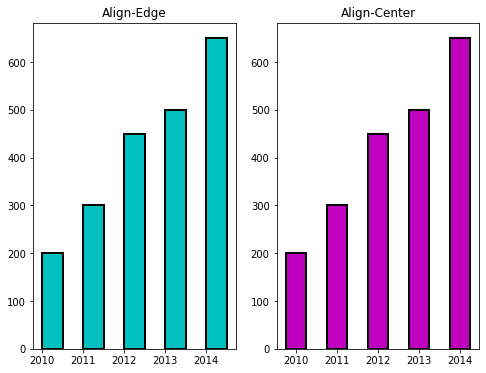

In [77]:
# Chia 2 subplots trên 1 dòng
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(8,6))

year = np.array([2010,2011,2012,2013,2014])
populations = np.array([200,300,450,500,650])

# Width: độ rộng cột
# Linewidth: độ dày viền
# Edgecolor: màu viền
# Align: 'center' (default) -> cột nằm ở giữa tọa độ x; 'edge' -> cột nằm bên phải tọa độ x
ax[0].bar(year, populations, color='c', width=0.5, align='edge', edgecolor='black', linewidth=2, label='Align-Edge')
ax[1].bar(year, populations, color='m', width=0.5, align='center', edgecolor='black', linewidth=2, label='Align-Center')

ax[0].title.set_text('Align-Edge')
ax[1].title.set_text('Align-Center')
plt.show()

### b) Biểu đồ cột ghép (cùng x)

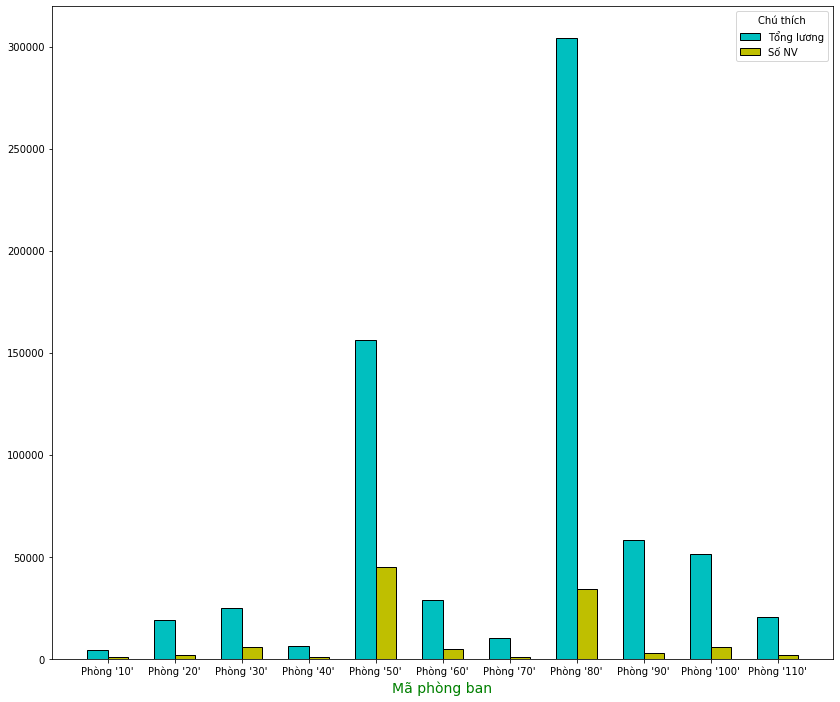

In [90]:
# Đọc file excel employees.xls trong thư mục thuc_hanh_1
emps = pd.read_excel('employees.xls')

# Đọc file excel departments.xls trong thư mục thuc_hanh_1
deps = pd.read_excel('departments.xls')

### Chuẩn bị data
# Kết 2 bảng nhân viên. phòng ban theo mã phòng ban
# lấy hết các cột trong bảng nhân viên và chỉ lấy 2 cột là mã phòng và tên phòng trong bảng phòng ban
df_NV_PB = pd.merge(emps, deps[['DEPARTMENT_ID','DEPARTMENT_NAME']], on=['DEPARTMENT_ID'], how='left')

# Tính tổng lương và số nhân viên
df_sum = df_NV_PB.groupby('DEPARTMENT_ID', as_index=False)['SALARY'].sum()
# print(df_sum)
df_count = df_NV_PB.groupby('DEPARTMENT_ID', as_index=False)['SALARY'].count()
# print(df_count)

### Vẽ biểu đồ cột ghép tổng lương và sô nhân viên
width = 3
fig, ax = plt.subplots(figsize=(14,12)) # Thay đổi kích thước hình

# 1 tọa độ x chia làm 2 -> điều chỉnh tọa độ x +- width/2
bar1 = plt.bar(df_sum['DEPARTMENT_ID'] - width/2, df_sum['SALARY'], color='c', width=3, edgecolor='k', label='Tổng lương')
bar2 = plt.bar(df_count['DEPARTMENT_ID'] + width/2, df_count['SALARY']*1000, color='y', width=3, edgecolor='k', label='Số NV')

# Đổi định dạng thông số trục x thành "Phòng + '<mã phòng>'"
x_ticks_maPB = ['Phòng \'' + str(int(item)) + '\'' for item in df_sum['DEPARTMENT_ID']]
# ax.set_xticklabels(x_ticks_maPB)
plt.xticks(df_sum['DEPARTMENT_ID'], x_ticks_maPB)

plt.xlabel('Mã phòng ban', size=14, color='g')

plt.legend(title='Chú thích')
plt.show()

### c) Biểu đồ cột kết hợp (khác x)

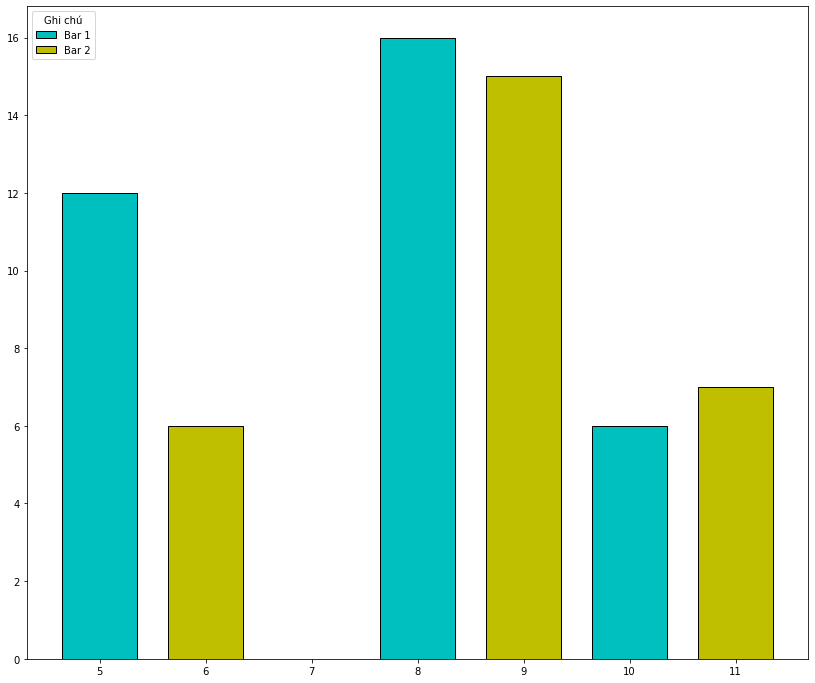

In [130]:
x = [5,8,10]
y = [12,16,6]

x1 = [6,9,11]
y1 = [6,15,7]

fig, ax = plt.subplots(figsize=(14,12)) # Thay đổi kích thước hình

bar1 = plt.bar(x, y, color='c', width=0.7, edgecolor='k', align='center')
bar2 = plt.bar(x1, y1, color='y', width=0.7, edgecolor='k', align='center')

# loc: location của ô chú thích
## 1: góc phải trên
## 2: góc trái trên
## 3: góc trái dưới
## 4: góc phải dưới
plt.legend([bar1,bar2], ['Bar 1','Bar 2'], loc=2, title='Ghi chú')
plt.show()

### d) Biểu đồ cột chồng

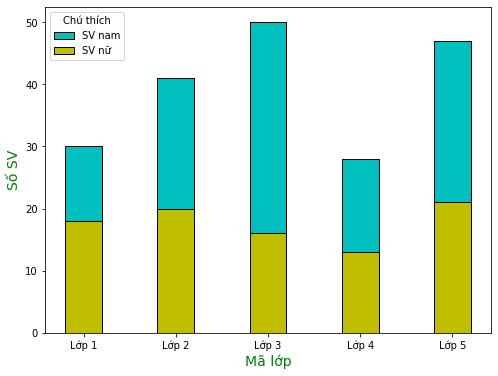

In [93]:
classID = np.array([1,2,3,4,5])
man = np.array([30,41,50,28,47])
woman = np.array([18,20,16,13,21])

### Vẽ biểu đồ cột ghép tổng lương và sô nhân viên
width = 3
fig, ax = plt.subplots(figsize=(8,6)) # Thay đổi kích thước hình

bar1 = plt.bar(classID, man, color='c', width=0.4, edgecolor='k', label='SV nam')
bar2 = plt.bar(classID, woman, color='y', width=0.4, edgecolor='k', label='SV nữ')

# Thay đổi chỉ số ở trục tọa độ
x_ticks_maLop = ['Lớp ' + str(item) for item in classID]
plt.xticks(classID, x_ticks_maLop)

plt.xlabel('Mã lớp', size=14, color='g')
plt.ylabel('Số SV', size=14, color='g')

plt.legend(title='Chú thích')
plt.show()

## *Dữ liệu định dạng tiền tệ

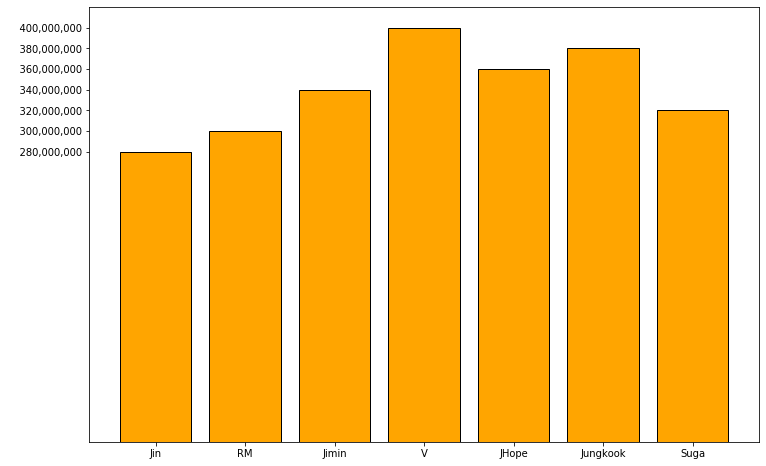

In [113]:
fig, ax = plt.subplots(figsize=(12,8)) # Thay đổi kích thước hình

name = ['Jin','RM','Jimin','V','JHope','Jungkook','Suga']
money = pd.Series([2.8e8, 3e8, 3.4e8, 4e8, 3.6e8, 3.8e8, 3.2e8])

## Định dạng tiền tệ
# money_format = money.map(lambda x: '{:15,.0f}'.format(x))
# Hoặc
money_format = ['{:15,.0f}'.format(item) for item in money]

plt.bar(name, money, color='orange', edgecolor='k')

plt.yticks(money, money_format)
plt.show()

## 2. Biểu đồ cột ngang: pyplot.barh (bar horizontal)

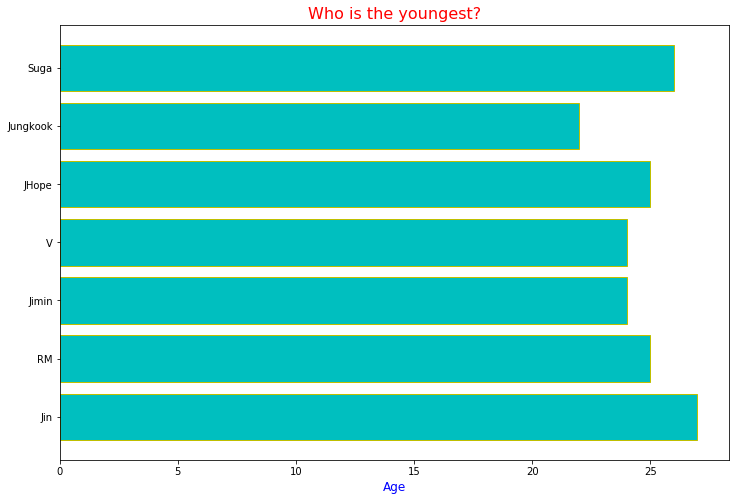

In [142]:
# Để tiết kiệm diện tích
fig, ax = plt.subplots(figsize=(12,8)) # Thay đổi kích thước hình

name = ['Jin','RM','Jimin','V','JHope','Jungkook','Suga']
age = [27,25,24,24,25,22,26]

y_pos = np.arange(len(name))

plt.barh(y_pos, age, align='center', color='c', edgecolor='y')

plt.yticks(y_pos, name)
plt.xlabel('Age', color='b', size=12)
plt.title('Who is the youngest?', color='r', size=16)
plt.show()